In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

In [67]:
df = pd.read_csv("telco.csv")

In [68]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [69]:
df.tail()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN
7042,3186-AJIEK,Male,44,No,No,No,No,0,United States,California,...,0,2043.36,8887.86,4,Stayed,No,38,5097,NaN,NaN


In [70]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [71]:
df['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [72]:
df.shape

(7043, 50)

In [73]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

### Exploratory Data Analysis


Missing Values:
 Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service

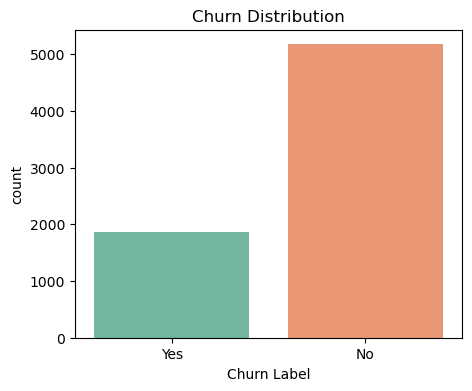

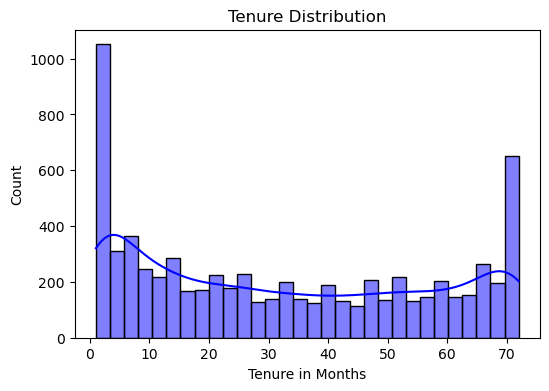

In [74]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Churn Label", data=df, hue="Churn Label", palette="Set2", legend=False)
plt.title("Churn Distribution")
plt.show()

# Example numeric column distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Tenure in Months"], kde=True, bins=30, color="blue")
plt.title("Tenure Distribution")
plt.show()

### Data Preprocessing

In [75]:
# Convert target column to binary

df["Churn Label"] = df["Churn Label"].map({"Yes":1, "No":0})


In [76]:
# Drop customerID (not useful)

if "Customer ID" in df.columns:
    df = df.drop("Customer ID", axis=1)

In [77]:
# Handle TotalCharges if it's object (convert to numeric)

if df["Total Charges"].dtype == "object":
    df["Total Charges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [78]:
# Fill any missing numeric values with median

df = df.fillna(df.median(numeric_only=True))

In [79]:
# One-hot encode categorical variables

df = pd.get_dummies(df, drop_first=True)

In [80]:
# Split into features & target

X = df.drop("Churn Label", axis=1)
y = df["Churn Label"]

In [81]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [82]:
# Scale numeric features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [83]:
log_reg = LogisticRegression(class_weight="balanced", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions

y_pred = log_reg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)[:,1]

### Evaluation


Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1035
           1     1.0000    1.0000    1.0000       374

    accuracy                         1.0000      1409
   macro avg     1.0000    1.0000    1.0000      1409
weighted avg     1.0000    1.0000    1.0000      1409

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


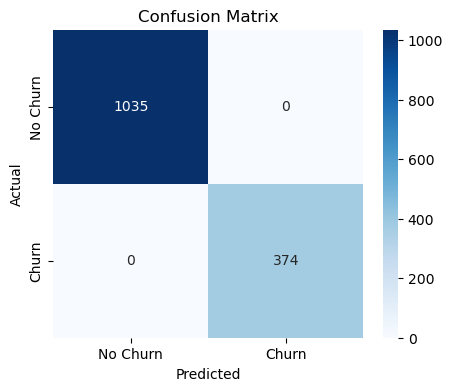

In [84]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Business Insights

In [85]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Factors Driving Churn:")
print(coefficients.head(10))
print("\nTop Factors Preventing Churn:")
print(coefficients.tail(10))



Top Factors Driving Churn:
                                         Feature  Coefficient
17                                   Churn Score     1.200222
1154                   Churn Category_Competitor     0.884174
1158     Churn Reason_Attitude of support person     0.858521
1155              Churn Category_Dissatisfaction     0.579437
1160   Churn Reason_Competitor made better offer     0.542584
1156                        Churn Category_Other     0.499503
1157                        Churn Category_Price     0.499111
1159  Churn Reason_Competitor had better devices     0.400561
1162   Churn Reason_Competitor offered more data     0.387152
1164                     Churn Reason_Don't know     0.386868

Top Factors Preventing Churn:
                         Feature  Coefficient
1147           Contract_One Year    -0.137896
1150  Payment Method_Credit Card    -0.205745
7               Tenure in Months    -0.228422
23                Dependents_Yes    -0.267736
1139         Online Security_

### Real-Time Simulation

In [63]:
# Example: simulate prediction for first 5 customers

sample_customers = X_test[:5]
predictions = log_reg.predict(sample_customers)
probs = log_reg.predict_proba(sample_customers)[:,1]

for i, (pred, prob) in enumerate(zip(predictions, probs)):
    if pred == 1:
        print(f"Customer {i}: 🚨 Likely to churn ({prob*100:.2f}% probability)")
    else:
        print(f"Customer {i}: ✅ Will stay ({(1-prob)*100:.2f}% probability)")


Customer 0: ✅ Will stay (99.98% probability)
Customer 1: ✅ Will stay (99.94% probability)
Customer 2: ✅ Will stay (100.00% probability)
Customer 3: ✅ Will stay (100.00% probability)
Customer 4: ✅ Will stay (99.99% probability)
